# P2 : Project Proposal and Initial Analyses

> - 😀 Name: **Léa Blinière**
> - 🪪 SCIPER: **283670**



<div style="padding:15px 20px 20px 20px;border-left:3px solid green;background-color:#e4fae4;border-radius: 20px;">

## **Assignment Description**
When you have completed Homework H1, your next task will be to continue working on the next project milestone, Milestone P2. In Milestone P2, you will collaborate with your team members to select and refine your project proposal. Your initial task is to choose a project. Although we provide the datasets for your use, it is your responsibility at this stage to conduct preliminary analyses and ensure that your proposed project is feasible given the available data. This initial assessment is critical for the project's success.

The primary objective of Milestone P2 is to become intimately familiar with the data, perform necessary preprocessing, and complete all essential descriptive statistics tasks. We expect you to establish a data pipeline, thoroughly documented in a notebook, and demonstrate that you have well-defined project objectives.

When describing the relevant aspects of the data and any additional datasets you plan to use, you should specifically demonstrate (though not exhaustively):

1. Your ability to manage and process the data, regardless of its size.
2. Your understanding of the data, including formats, distributions, handling missing values, identifying correlations, and more.
3. Your consideration of methods to enrich, filter, or transform the data to suit your project's requirements.
4. Your well-thought-out plan and ideas for the methods you intend to employ, including essential mathematical details in the notebook.
5. A reasonable and sound plan for analysis and communication, which may involve discussing alternative approaches you considered and why you chose the ones presented.

We will evaluate Milestone P2 based on the thoroughness and clarity of these steps, the quality of your code and its documentation, the feasibility and critical awareness of your project, and the clarity and reasonableness of your project idea. Use Milestone P2 to ensure that your project (including the idea and its feasibility) is well-structured and reviewed before advancing too far into the final Milestone P3. There will be dedicated project office hours to assist you.

### Deliverables

- ✅ Readme.md file containing the detailed project proposal (up to 1000 words). Your README.md should contain:
    Title
    Abstract: A 150 word description of the project idea and goals. What’s the motivation behind your project? What story would you like to tell, and why?
    Research Questions: A list of research questions you would like to address during the project.
    Proposed additional datasets (if any): List the additional dataset(s) you want to use (if any), and some ideas on how you expect to get, manage, process, and enrich it/them. Show us that you’ve read the docs and some examples, and that you have a clear idea on what to expect. Discuss data size and format if relevant. It is your responsibility to check that what you propose is feasible.
    Methods
    Proposed timeline
    Organization within the team: A list of internal milestones up until project Milestone P3.
    Questions for TAs (optional): Add here any questions you have for us related to the proposed project.
- ✅  Notebook containing initial analyses and data handling pipelines. We will grade the **correctness**, **quality of code**, and **quality of textual descriptions**. There should be a single Jupyter notebook containing the main logic. The implementation of helper functions that is not essential for understanding the main logic should be contained in **external scripts/modules*** that will be called from the main notebook.

</div>

# Table of Contents
- **[PART 1: Getting familiar with the data and Preparing the Data](#1)**
    - [1.1 Read the Movie Metadata Dataset**](#11)
    - [1.2 Movie Metadata Distributions](#12)
    - [1.3 Handling Missing Values](#13)
    - [1.4 Format Conversion](#11)
    
- **[PART 2: Analysis and Data Enrichment](#2)**
    - [2.1 Integration of Additional Data:](#21)

- **[PART 3: Descriptive and Exploratory Analysis](#3)**
    - [3.1 Descriptive Statistics:](#31)
    - [3.2 Seasonal Trends:](#32)
    - [3.3 Visualizations:](#33)
    - [3.4 Pattern Research:](#34)
- **[PART 4: Preparation for Advanced Analysis](#2)**
    - [4.1 Method Selection](#41)
    - [4.2 Data Preparation](#42)

    


### **Import Librairies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

from preprocessing import *
from plot_functions import *
from utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

### **Load Path**

### GOOGLE DRIVE 

In [34]:
# Data Path
DATA_RESULTS = 'Data_results/'

MOVIE_PATH = get_path(
    "https://drive.google.com/file/d/1gIeripRBttNRhJGQKmr-8zeZVLIPXo8s/view?usp=sharing"
)

# Additional data
OSCAR_PATH = get_path(
    "https://drive.google.com/file/d/1IWOH_y_Ikai-6MxcX5WnFm2jqOKCQVQf/view?usp=sharing"
)

IMBD_TITLE_PATH = get_path(
    "https://drive.google.com/file/d/1t6_kQ7tfLsORItYH8f17_EwRQgEm-t69/view?usp=sharing"
)

IMDB_RATING_PATH = get_path(
    "https://drive.google.com/file/d/10EHNScttfKueXibTpASCq2IejROCtEkT/view?usp=sharing"
)

# Load Data already preprocessed
IMBD_MERGE_PATH = get_path(
    "https://drive.google.com/file/d/1NgId8mT7LZZVDVNH0qCz7xd9ft2wyZUI/view?usp=sharing"
)

DATA_CLEAN_PATH = get_path(
    "https://drive.google.com/file/d/1LXQXTnxy4VHJIkWGoECk540Oc0ZUEYuA/view?usp=sharing"
)


### LOCAL DATA 

In [33]:
# Data Path
DATA_FOLDER = 'Data/'
DATA_SAVE_FOLDER = 'Data_Processed/'

PLOT_DATASET = DATA_FOLDER+"plot_summaries.txt"
CHARACTER_DATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_DATASET = DATA_FOLDER+"movie.metadata.tsv"

# Additional data
OSCAR_DATASET = DATA_FOLDER+"the_oscar_award.csv"
IMDB_DATASET = DATA_FOLDER+"title.tsv"
IMDB_RATING_DATASET = DATA_FOLDER+"ratings.tsv"

# Test dataset in the original study
NAME_DATASET = DATA_FOLDER+"name.clusters.txt"
TVTROPES_DATASET = DATA_FOLDER+"tvtropes.clusters.txt"

<a name="1"></a>
## **PART 1: Getting familiar with the data and Preparing the Data**
---

In this section, we will create the data preprocessing pipeline for our project. Specifically, we will explore the Movie Metadata dataset, which contains information for 81,741 movies. This dataset was extracted from the November 4, 2012 dump of Freebase. It includes the following columns:

1. Wikipedia movie ID
2. Freebase movie ID
3. Movie name
4. Movie release date
5. Movie box office revenue
6. Movie runtime
7. Movie languages (Freebase ID:name tuples)
8. Movie countries (Freebase ID:name tuples)
9. Movie genres (Freebase ID:name tuples).

The focus of this section will be on preprocessing the data. To begin, we will explore our study data and its distributions. Since our study largely relies on the release date of the movies, our goal is to make the dataframe more usable. Given that a movie can have multiple genres, we will reorganize the dataframe so that each row represents a single genre. This will simplify its utilization.

Next, we will examine the distribution of genres in our dataset, enabling us to concentrate on the most prevalent genres. Subsequently, we will merge our data with two additional datasets, the IMDb dataset and the award dataset.

### **1.1 Load the Data and Visual Inspection**

### Movie Metadata 

In [8]:
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages",
    "Movie countries",
    "Movie genres"
]
df_movie = pd.read_csv(MOVIE_PATH, sep='\t', header=None, names=column_names)
df_movie.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


> Il va falloir faire une courte description du data : la taille, description des colonnes et comment elles se presentent actuellement.
> Il faut ajouter les datas addiditionnels 

>Il va falloir gerer les NAN values et le dictionnaires des movies languages, countries et genres

### IMBd Dataset

> A rajouter asap

In [9]:
column_names = [
    "titleId",  # string: an alphanumeric unique identifier of the title
    "ordering",  # integer: a number to uniquely identify rows for a given titleId
    "title",  # string: the localized title
    "region",  # string: the region for this version of the title
    "language",  # string: the language of the title
    "types",  # array: Set of attributes for this alternative title (e.g., "alternative", "dvd", etc.)
    "attributes",  # array: Additional terms to describe this alternative title, not enumerated
    "isOriginalTitle"  # boolean: 0 for not original title, 1 for original title
]

###### Too heavy to load if uncessary ######

""" df_imbd = pd.read_csv(IMDB_RATING_PATH, sep='\t', header=None, names=column_names)
df_imbd.drop(0, inplace=True)
df_imbd.head(5) """

" df_imbd = pd.read_csv(IMDB_RATING_PATH, sep='\t', header=None, names=column_names)\ndf_imbd.drop(0, inplace=True)\ndf_imbd.head(5) "

In [10]:
column_names = [
    "titleId",          # string: an alphanumeric unique identifier of the title
    "averageRating",   # float: weighted average of all the individual user ratings
    "numVotes"         # integer: number of votes the title has received
]

###### Too heavy to load if uncessary ######
""" df_rating = pd.read_csv(IMDB_RATING_PATH, sep='\t', header=None, names=column_names)
df_rating.drop(0, axis = 0, inplace = True)
df_rating.head(5) """

" df_rating = pd.read_csv(IMDB_RATING_PATH, sep='\t', header=None, names=column_names)\ndf_rating.drop(0, axis = 0, inplace = True)\ndf_rating.head(5) "

In [11]:
""" df_imbd_ = pd.merge(df_rating, df_imbd, left_on='titleId', right_on='titleId', how='inner')
df_imbd_.drop(['titleId', 'ordering', 'region', 'language', 'types', 'attributes', 'isOriginalTitle'], axis = 1, inplace = True)

PATH_IMBD = DATA_SAVE_FOLDER + "df_rating.csv"
df_imbd_.to_csv(save_path, index=False, encoding='utf-8', errors='ignore') """

' df_imbd_ = pd.merge(df_rating, df_imbd, left_on=\'titleId\', right_on=\'titleId\', how=\'inner\')\ndf_imbd_.drop([\'titleId\', \'ordering\', \'region\', \'language\', \'types\', \'attributes\', \'isOriginalTitle\'], axis = 1, inplace = True)\n\nPATH_IMBD = DATA_SAVE_FOLDER + "df_rating.csv"\ndf_imbd_.to_csv(save_path, index=False, encoding=\'utf-8\', errors=\'ignore\') '

In [35]:
# Read the CSV file into a DataFrame
PATH_IMBD = DATA_SAVE_FOLDER + "df_rating.csv"
df_imbd_local = pd.read_csv(PATH_IMBD)

In [30]:
df_imbd_

,averageRating,numVotes,title
0,5.7,2007,Карменсіта
1,5.7,2007,Carmencita
2,5.7,2007,Carmencita - spanyol tánc
3,5.7,2007,Καρμενσίτα
4,5.7,2007,Карменсита
...,...,...,...
4548441,7.0,22,Episodio #10.15
4548442,7.0,22,Folge #10.15
4548443,7.0,22,Episódio #10.15
4548444,7.0,22,एपिसोड #10.15


### Award Dataset 

In [16]:
column_names = [
    "Movie Year",
    "Ceremony Year",
    "Ceremony", 
    "Category",
    "Name",
    "Movie name",
    "Winner"
]

df_award = pd.read_csv(OSCAR_PATH, header=None, names=column_names).drop(0)
df_award.head(5)

,Movie Year,Ceremony Year,Ceremony,Category,Name,Movie name,Winner
1,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
2,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
4,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
5,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


> A rajouter asap

### **1.2 Data cleaning**

### Movie Metadata 

In this initial step, we will undertake the following tasks:

1. **Format Conversion** 
   The columns "Movie languages," "Movie countries," and "Movie genres" currently store Freebase IDs, which makes it challenging to understand and interpret the data. Our first task is to convert these dictionaries containing Freebase IDs into simple strings that contain the actual language, country, or genre names.

2. **Reprocessing film languages**
   In this step, the languages associated with the films are reprocessed. Some films may have been considered "silent films," meaning they were silent and had a specified language. To simplify the analysis, these films are now identified as "silent film" in the language category. Additionally, mentions of the language "english language" are modified to simply "english" for easier processing and subsequent data analysis.

3. **Creating multiple rows for films with multiple genres, languages, or countries**
   This step aims to make data analysis more manageable by handling films with multiple genres, languages, or countries separately. Instead of having a single entry for a film with multiple characteristics, multiple distinct rows are created, each corresponding to a unique characteristic. For example, if a film has two different genres, two separate rows will be created for that film, each indicating a different genre. This allows for a more detailed and precise analysis of the data. It is also mentioned that in the future, the team may focus only on films with a single genre, a single language, and a single country to avoid potential bias caused by the multiplicity of these characteristics.

4. **Splitting the date into 3 columns: year, month, day, and adding a "month available" column**
   In this step, the dates associated with the films are broken down into three distinct parts: the year (year), the month (month), and the day (day). Additionally, a new column called "month available" is created. This column can potentially be useful if the research team seeks to complete missing data regarding the release month of the films.

> changer les dates par des integers 

In [17]:
save_path = DATA_SAVE_FOLDER + "df_process.csv"
#df_movie_ = process_movie_data(df_movie)

In [18]:
# Read the CSV file into a DataFrame
df_movie = pd.read_csv(DATA_CLEAN_PATH)
df_movie.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True
1,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Science Fiction,2001.0,8.0,24.0,True
2,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Horror,2001.0,8.0,24.0,True
3,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Adventure,2001.0,8.0,24.0,True
4,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Supernatural,2001.0,8.0,24.0,True


### Award Dataset 

> Suppression de toutes les rows qui ne concerne pas des recompenses pour un film (type Honorary award)
> drop colonne inutile type ceremony year 
> on garde movie year pour faore match 
> on degage name 

In [19]:
df_award = pd.read_csv(OSCAR_PATH, header=None, names=column_names).drop(0)
df_award = df_award.dropna(subset=['Movie name'], axis=0)
df_award = df_award.drop(['Ceremony Year', 'Ceremony', 'Name'], axis=1)
df_award['Movie Year'] = df_award['Movie Year'].astype(int)
df_award.head(5)

,Movie Year,Category,Movie name,Winner
1,1927,ACTOR,The Noose,False
2,1927,ACTOR,The Last Command,True
3,1927,ACTRESS,A Ship Comes In,False
4,1927,ACTRESS,7th Heaven,True
5,1927,ACTRESS,Sadie Thompson,False


### **1.3 Data Merge**

### Award Dataset and Movie Dataset 

> on doit enlever les datas qui ne correspondent pas en checkant l'annéé

In [20]:
df_merge_award = pd.merge(df_movie, df_award, left_on='Movie name', right_on='Movie name', how='inner')

In [21]:
df_merge_award = pd.merge(df_movie, df_award, left_on='Movie name', right_on='Movie name', how='inner')

##### to fix in the preprocessign 
release_year_list = df_merge_award['Release Year'].to_list()
release_year_list =  [int(x) if not pd.isna(x) else 0 for x in release_year_list]
df_merge_award['Release Year'] = release_year_list
##### 
df_merge_award = df_merge_award[df_merge_award['Release Year'] == df_merge_award['Movie Year']]

In [22]:
print("We have {} data for the films that have been selected for the Oscars".format(df_merge_award['Movie name'].nunique()))

We have 3087 data for the films that have been selected for the Oscars


### IMBd Dataset and Movie Dataset 

In [23]:
df_imbd_

,titleId,averageRating,numVotes
0,<!DOCTYPE html><html><head><title>Google Drive...,NaN,NaN


In [19]:
df_merge_rating = pd.merge(df_movie, df_imbd_, left_on='Movie name', right_on='title', how='inner')
df_merge_rating.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,averageRating,numVotes,title
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928,Ghosts of Mars
1,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928,Ghosts of Mars
2,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928,Ghosts of Mars
3,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928,Ghosts of Mars
4,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928,Ghosts of Mars


In [20]:
df_merge_rating.drop(['title'], axis = 1, inplace = True)
df_merge_rating.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928
1,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928
2,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928
3,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928
4,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,4.9,56928


<a name="1"></a>
## **PART 2: Data Vizualization**
---

### **2.1 Release Date**

> On fera attention a ne pas prendre les duplicates : un film apparait seulement une fois 

In [59]:
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True


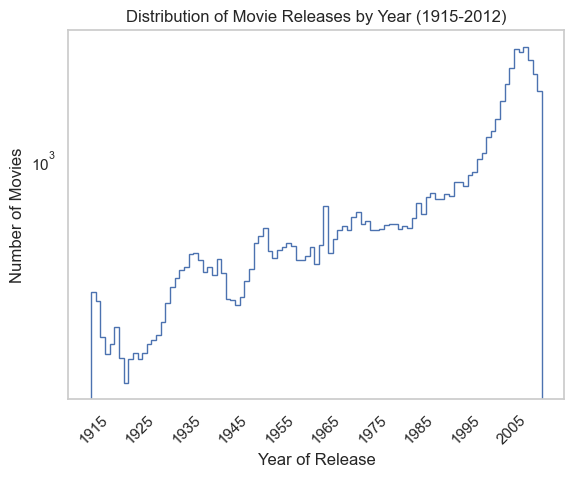

In [60]:
plot_movie_release_distribution(df_movie.drop_duplicates(subset=['Movie name'], inplace=False))

> Faire un commentair sur la distribution des films au cours du temps : avancé de maniere croissante 
> ameliorer l'echelle sur la gauche : rendre visible les numéros 

### **2.1 Genre Distribution**

In [89]:
print("In our dataset, we have {} film genres represented".format(df_movie['Movie genres'].nunique()))

In our dataset, we have 363 film genres represented


> afin de pousser l'analyse nous allons nous epncehr sur les 5 genres les plus representé de notre dataset

In [90]:
sorted_genre_counts = count_and_sort_movie_genres(df_movie)

In [91]:
# Select the top 5 genres
selected_genres = list(sorted_genre_counts.keys())[:5]
print("Number of genres selected: ", len(selected_genres))
print("Selected genres: ", selected_genres)

Number of genres selected:  5
Selected genres:  ['Drama', 'Comedy', 'World cinema', 'Romance Film', 'Thriller']


> maintenant filtrons notre datatset en ne selectionne que les films se trouvant dans ces genres ci : 

In [92]:
df_filter = filter_movies_by_genres(df_movie, selected_genres)

> Repartion de nos genres dans le dataset filtré


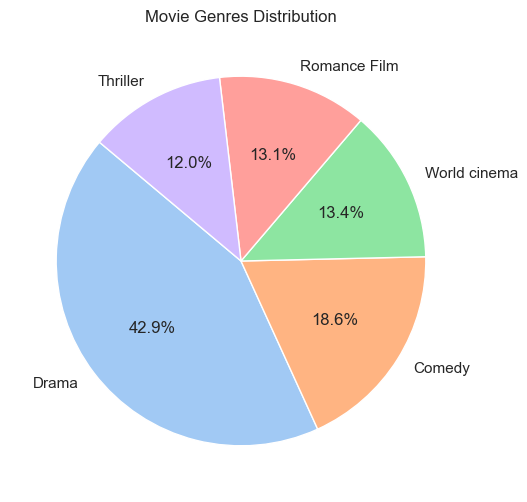

In [93]:
create_genre_pie_chart(df_filter)

> Add a comment

### **2.3 Release Month**

> Tout d'abord voyons voir la distribution des mois sur notre dataset entier. Ici encore nous ne sommes interesse que par filmm donc on plot les unique 

In this dataset, there are 36429 movies with missing release month out of a total of 75478 movies.
Mean Release Year (Month Available): 1977
Standard Deviation Release Year (Month Available): 31

Mean Release Year (Month Not Available): 1978
Standard Deviation Release Year (Month Not Available): 26


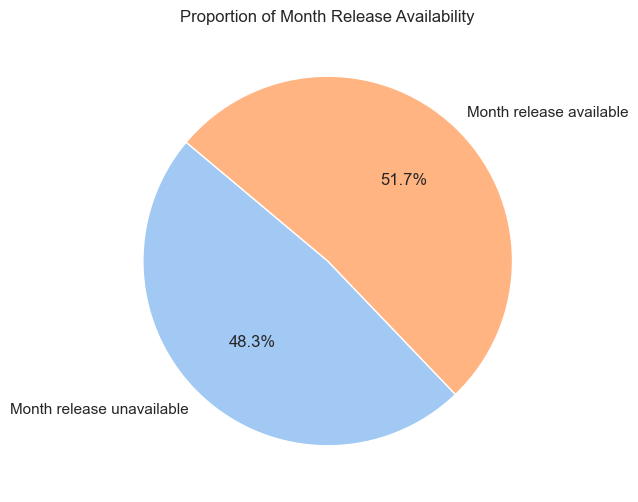

In [94]:
plot_month_release_availability(df_movie.drop_duplicates(subset=['Movie name'], inplace=False))

> Parmi les films de ce dataset dont nous avons la date du mois de sortie voila la repartition des sorties par mois tout genre confondus. 

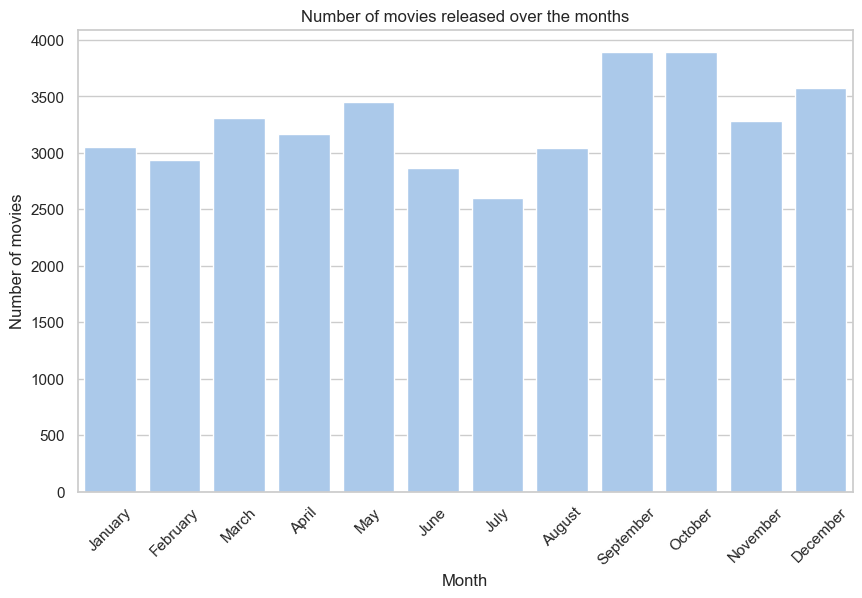

In [97]:
plot_monthly_movie_counts(df_movie.drop_duplicates(subset=['Movie name'], inplace=False))

> Maintenant nous pouvons etudier le numebr de film release par mois et par genre en en selectionannt que les 5 genres les plus present 


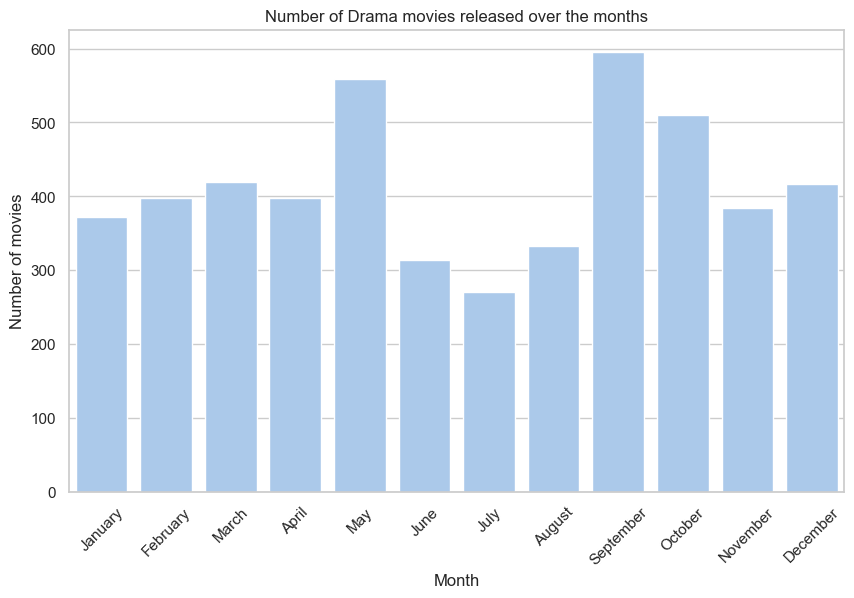

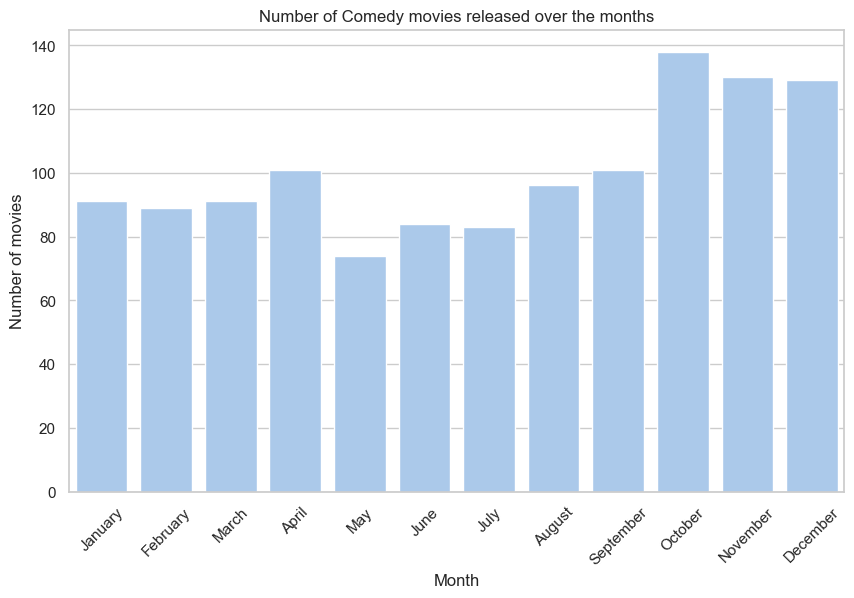

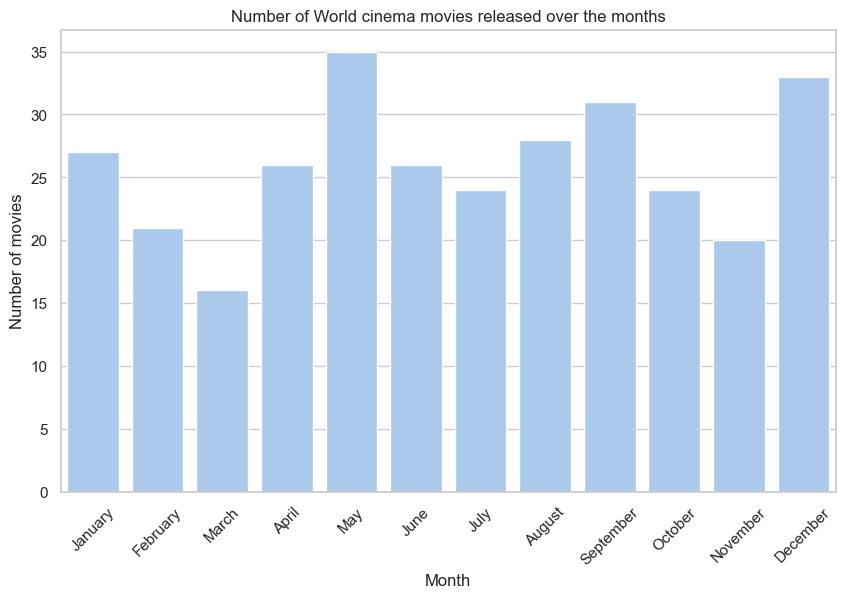

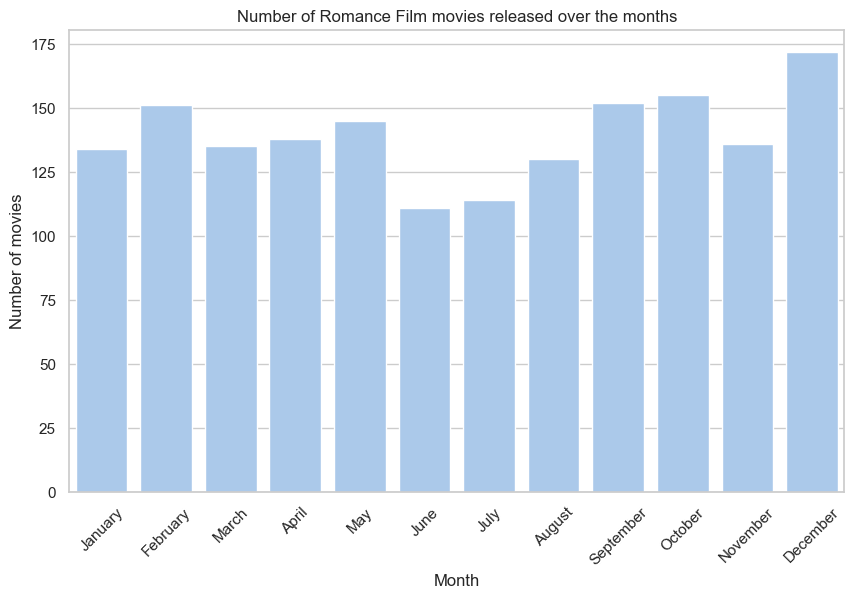

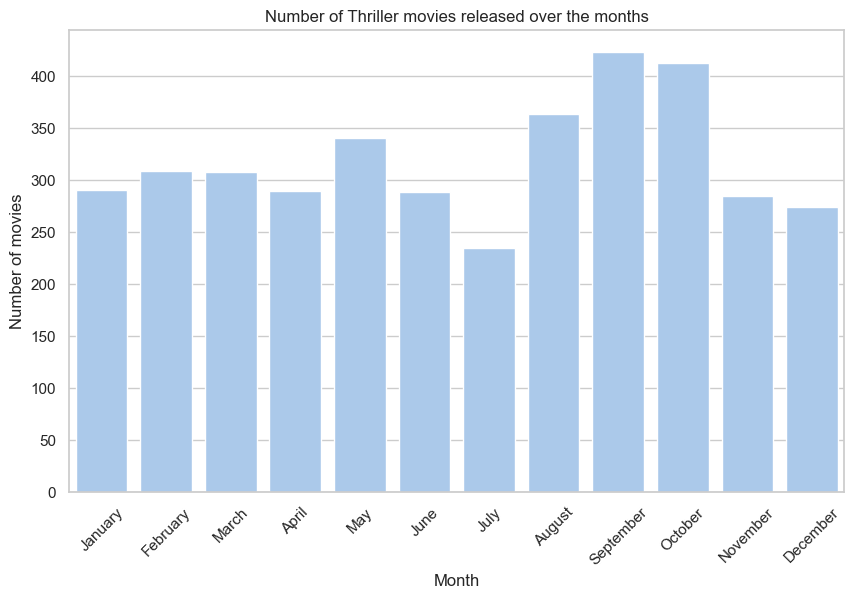

In [98]:
plot_monthly_movie_counts(df_movie.drop_duplicates(subset=['Movie name'], inplace=False), selected_genres)

> faire un commentaire : ici rien ne se distingue vrmt du moins on ne peux rien conclure de ces plots, cepdenant on remarque que ils n'ont tout de meme pas les memes distributiosn. 

> il serait interessant de considerer plus de genre pour le milestone 3 et de voir si il en xiste certains grace a  des test statistiques pour lequels ils exsite des saisons comme on le dit 

### **2.4 Revenue depending on the Time of Release**

### **2.5 Country representation**

In [99]:
df_movie_unique = df_movie.drop_duplicates(subset=['Movie name'], inplace=False)
df_movie_unique.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True


> check si c'est country release ou country du directeur du film 

In [100]:
print("In our dataset, we have {} countries in which movies have been released".format(df_movie['Movie countries'].nunique()))

In our dataset, we have 147 countries in which movies have been released


> recupere les continents

In [36]:
list_continents = []

for index, row in tqdm(df_movie.iterrows()):
    if pd.isna(row['Movie countries']):

        list_continents.append(np.nan)
    else : 
        list_continents.append(country_to_continent(row['Movie countries']))
        
df_movie['Movie Continent'] = list_continents

380365it [00:15, 25300.65it/s]


In [35]:
df_movie

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Movie Continent
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001.0,8.0,24.0,True,North America
1,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Science Fiction,2001.0,8.0,24.0,True,North America
2,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Horror,2001.0,8.0,24.0,True,North America
3,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Adventure,2001.0,8.0,24.0,True,North America
4,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Supernatural,2001.0,8.0,24.0,True,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380360,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,Japanese,Japan,Drama,1992.0,5.0,21.0,True,Asia
380361,12476867,/m/02w7zz8,Spliced,NaN,86.0,English,Canada,Thriller,2002.0,NaN,NaN,False,North America
380362,12476867,/m/02w7zz8,Spliced,NaN,86.0,English,Canada,Horror,2002.0,NaN,NaN,False,North America
380363,12476867,/m/02w7zz8,Spliced,NaN,86.0,English,Canada,Slasher,2002.0,NaN,NaN,False,North America


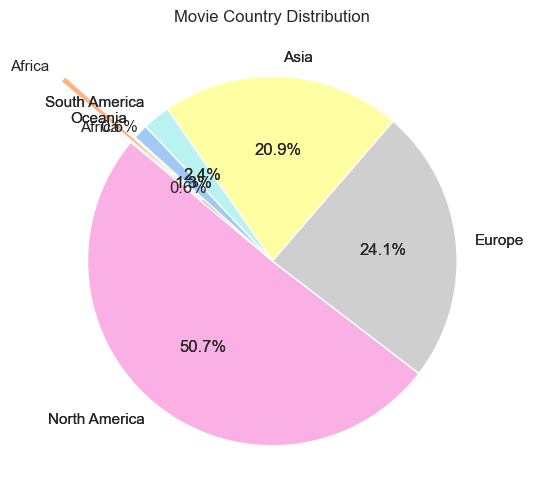

In [44]:
df_copy = df_movie.drop_duplicates(subset=['Movie name'], inplace=False)
labels = df_copy['Movie Continent'].value_counts().index.tolist()
data_counts = df_copy['Movie Continent'].value_counts().values.tolist()
# Explode the smallest slice to avoid overlapping labels
explode = [0.5 if i == min(data_counts) else 0 for i in data_counts]
# Create the pie chart using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
plt.pie(data_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.pie(data_counts, labels=labels, autopct='%1.1f%%', 
            startangle=140, explode=explode)
plt.title("Movie Country Distribution")

plt.show()

<a name="1"></a>
## **PART 2: From the Provided Dataset to Addressing Our Scientific Question**
---

The research questions we would like to address can be divided into two distinct parts.

* Question 1: What is the relationship between the timing of a film's release in the year, its genre, and recurring patterns? If such patterns exist, when have they been observed, and do they vary based on the film's place of release? Can these patterns be used to predict what genre of film will be released next season?

* Question 2: How does the timing of the release impact a film's success at the box office and its chances of winning awards?

In this section, we will construct two datasets to answer these two questions, and we will perform a more extensive analysis for milestone 3.